In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# taken from: https://www.stats.govt.nz/experimental/covid-19-data-portal on 2023-09-09
df_raw = pd.read_excel("data/covid_19_data_portal.xlsx",
                       sheet_name='data')
df_raw = df_raw[["ResourceID", "Period", "Label1", "Value", "Unit", "Measure"]]

In [111]:
def process_df(df, resource, label, val_name):
    df['Period'] = pd.to_datetime(df['Period'])
    return df.query('ResourceID == @resource & Label1 == @label')\
                .rename({'Value':val_name}, axis=1)\
                .drop(["ResourceID", "Label1", "Unit", "Measure"], axis=1)\
                .set_index("Period")\
                .copy()

border_df_daily = process_df(df_raw, "CPTRA1", "Total", "border_arrivals") # daily
border_df = border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals']\
                            .agg(['sum', len, 'mean', 'min', 'max']) # monthly
border_df = border_df.rename({"sum":"total_border",
                                "len":"count_border",
                                "mean":"mean_border",
                                "min":"min_border",
                                "max":"max_border"}, axis=1)

activ_df = process_df(df_raw, "CPACT12", "New Zealand Activity Index (NZAC)", "activity") # monthly
stu_df = process_df(df_raw, "CPVIS1", "Fee paying", "student_visas") # monthly
work_df = process_df(df_raw, "CPVIS2", "Total", "work_visas") # monthly

df = border_df.join(activ_df).join(work_df).join(stu_df).dropna()

<Axes: xlabel='Period'>

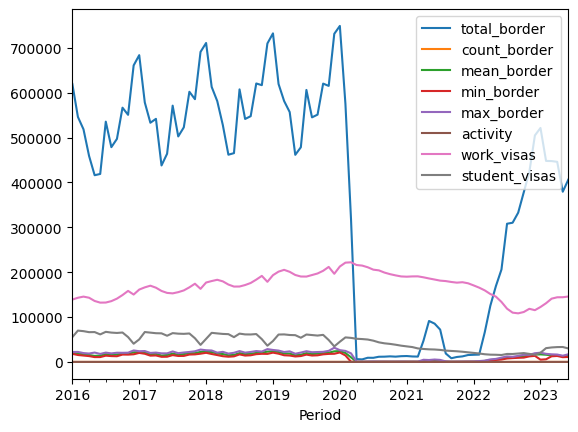

In [116]:
df.plot()

In [113]:
df.describe()

,total_border,count_border,mean_border,min_border,max_border,activity,work_visas,student_visas
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,385848.644444,30.422222,12688.128833,10107.833333,15450.200000,2.404609,169767.800000,45429.266667
std,245591.311144,0.834344,8074.821791,6995.711974,9400.945903,4.093974,28209.648699,17494.452495
min,5622.000000,28.000000,181.354839,0.000000,513.000000,-13.616500,108300.000000,15435.000000
25%,86837.250000,30.000000,2870.032258,674.500000,4923.750000,1.312900,146583.750000,30039.000000
50%,464733.000000,31.000000,15491.100000,12608.500000,19263.000000,2.219700,173404.500000,50493.000000
75%,574226.250000,31.000000,18759.483871,15389.250000,22253.500000,3.206800,190712.250000,61342.500000
max,748999.000000,31.000000,24161.258065,21076.000000,31612.000000,33.793400,222039.000000,69807.000000


In [107]:
border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals'].agg(['sum', len, 'mean', 'min', 'max']) # monthly

,sum,len,mean,min,max
Period,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0
...,...,...,...,...,...
2023-05-31,379405.0,31,12238.870968,10589.0,13873.0
2023-06-30,406391.0,30,13546.366667,11067.0,17005.0
2023-07-31,517796.0,31,16703.096774,13209.0,19874.0


In [110]:
df.rename({"sum":"total_border",
           "len":"count_border",
           "mean":"mean_border",
           "min":"min_border",
           "max":"max_border"}, axis=1)

,total,len,mean,min,max,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [97]:
df

,sum,len,mean,min,max,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [99]:
work_df.head(10)

,work_visas
Period,
2015-01-31,123504.0
2015-02-28,126324.0
2015-03-31,128370.0
2015-04-30,126129.0
2015-05-31,119424.0
2015-06-30,115965.0
2015-07-31,114624.0
2015-08-31,116472.0
2015-09-30,121068.0
